In [23]:
from random import random

from compas.colors import Color
from compas.geometry import Box, Sphere, Cylinder
from compas.geometry import Frame
from compas.geometry import Translation
from compas_viewer import Viewer
from compas.files import OBJ, STL
from compas.datastructures import Mesh


import numpy as np
from sklearn.manifold import Isomap
from skimage.feature import hog
import matplotlib.pyplot as plt


In [10]:
#load the scene mesh and part mesh
scene_mesh = Mesh.from_stl('model.stl')
part_mesh = Mesh.from_stl('part.stl')


c:\Users\ansko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\ansko\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\ansko\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\ansko\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a

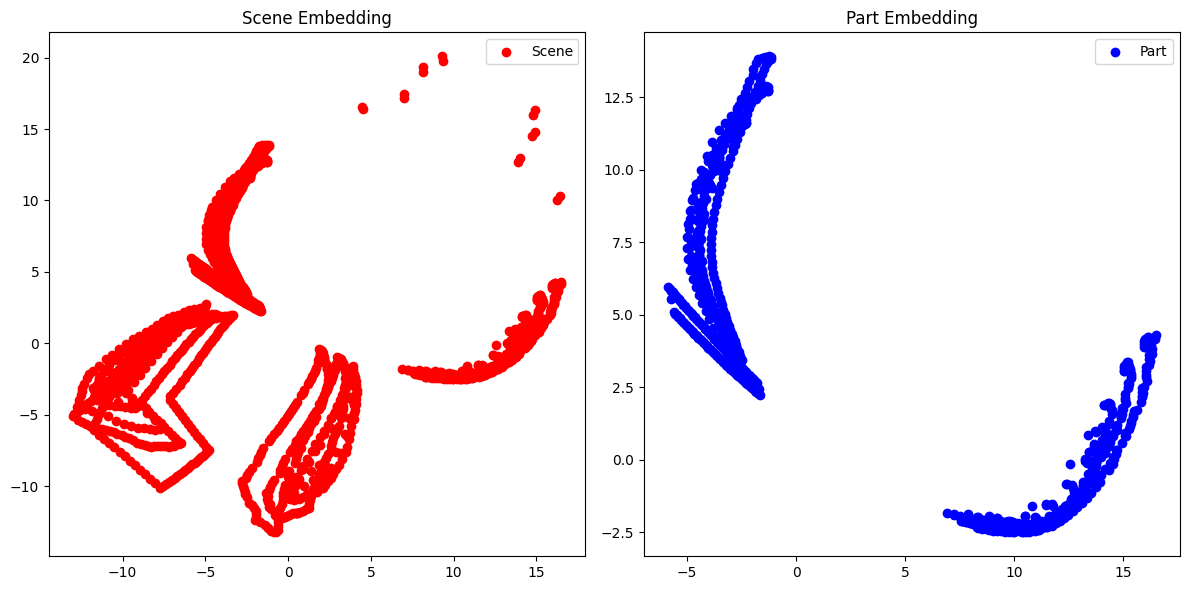

In [19]:
# Isomap parametrization
scene_vertices = np.array(scene_mesh.vertices_attributes('xyz'))
part_vertices = np.array(part_mesh.vertices_attributes('xyz'))

isomap = Isomap(n_components=2, n_neighbors=10)
scene_embedding = isomap.fit_transform(scene_vertices)
part_embedding = isomap.transform(part_vertices)

#plot part and scene embeddings side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Scene Embedding')
plt.scatter(scene_embedding[:, 0], scene_embedding[:, 1], c='red', label='Scene')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Part Embedding')
plt.scatter(part_embedding[:, 0], part_embedding[:, 1], c='blue', label='Part')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Convert embeddings to images for HoG
scene_embedding_image = np.zeros((100, 100, 3), dtype=np.uint8)
part_embedding_image = np.zeros((100, 100, 3), dtype=np.uint8)
for i, (x, y) in enumerate(scene_embedding):
    scene_embedding_image[int(y * 50) + 50, int(x * 50) + 50] = [255, 0, 0]  # Red for scene
for i, (x, y) in enumerate(part_embedding):
    part_embedding_image[int(y * 50) + 50, int(x * 50) + 50] = [0, 0, 255]  # Blue for part

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Scene Embedding Image')
plt.imshow(scene_embedding_image)
plt.subplot(1, 2, 2)
plt.title('Part Embedding Image')
plt.imshow(part_embedding_image)
plt.tight_layout()
plt.show()


ValueError: The input image is too small given the values of pixels_per_cell and cells_per_block. It should have at least: 16 rows and 16 cols.

In [ ]:

# Compute signatures for the scene and part meshes using the Isomap embeddings via HoG
hog_scene = hog(scene_embedding_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
hog_part = hog(part_embedding_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

In [9]:
viewer = Viewer()
viewer.scene.clear()
#render mesh with vertex colors, faces, verticies, edges
obj1 = viewer.scene.add(mesh, use_vertexcolors=True, vertexcolor=vcol, show_faces=True, show_vertices=True, show_edges=True)
viewer.show()